# Have you ever calculate probabilities with Pandas?

## 1. Distributions

In [3]:
import pandas as pd

def gen_data():
    
    '''
        I for intelligence taking value i_0, i_1 (low, high)
        D for course difficulty taking value d_0, d_1 (easy, hard)
        G for grade taking value g_1, g_2, g_3 (different grades)
        
        This generates a joint distribution
    
    '''
    prob = [0.126,0.168,0.126,0.009,0.045,0.126,
            0.252,0.0224,0.0056,0.06,0.036,0.024]
    
    i = [ f'i_{t}' for t in range(2)]
    d = [ f'd_{t}' for t in range(2)]
    g = [ f'g_{t}' for t in range(1,4)]

    cats = [[ii,dd,gg] for ii in i for dd in d for gg in g]
    df = pd.DataFrame(cats, columns  =['I','D','G'])
    df['prob'] = prob
    return df

In [2]:
df = gen_data()
df

,I,D,G,prob
0,i_0,d_0,g_1,0.1260
1,i_0,d_0,g_2,0.1680
2,i_0,d_0,g_3,0.1260
3,i_0,d_1,g_1,0.0090
4,i_0,d_1,g_2,0.0450
5,i_0,d_1,g_3,0.1260
6,i_1,d_0,g_1,0.2520
7,i_1,d_0,g_2,0.0224
8,i_1,d_0,g_3,0.0056
9,i_1,d_1,g_1,0.0600


## 2. Conditioning

**Condition on g1: unnormalized distribution**

In [5]:
df[df.G == 'g_1']

,I,D,G,prob
0,i_0,d_0,g_1,0.126
3,i_0,d_1,g_1,0.009
6,i_1,d_0,g_1,0.252
9,i_1,d_1,g_1,0.060


**Normalized version**

In [10]:
tmp = df[df.G == 'g_1'].copy()
tmp['prob'] = tmp['prob'] / tmp['prob'].sum()

assert tmp.prob.sum() == 1
tmp

,I,D,G,prob
0,i_0,d_0,g_1,0.281879
3,i_0,d_1,g_1,0.020134
6,i_1,d_0,g_1,0.563758
9,i_1,d_1,g_1,0.134228


## 3. Marginalization

**Suppose this is a joint distribution over I and G**

In [13]:
p = tmp.drop('G', axis = 1).copy()
p

,I,D,prob
0,i_0,d_0,0.281879
3,i_0,d_1,0.020134
6,i_1,d_0,0.563758
9,i_1,d_1,0.134228


**Simply use a groupby, we get marginalized probability distribution**

In [15]:
p.groupby('D').sum().reset_index()

,D,prob
0,d_0,0.845638
1,d_1,0.154362


## 4. Factors

**Factors are functions or tables, taking a set of random variables.**      
**For each possible combination, return a real numbered value.**    
**Scope(of a factor) is a set of variables associated with.**  

For example, $P(I, D, G)$ is a factor

In [16]:
df

,I,D,G,prob
0,i_0,d_0,g_1,0.1260
1,i_0,d_0,g_2,0.1680
2,i_0,d_0,g_3,0.1260
3,i_0,d_1,g_1,0.0090
4,i_0,d_1,g_2,0.0450
5,i_0,d_1,g_3,0.1260
6,i_1,d_0,g_1,0.2520
7,i_1,d_0,g_2,0.0224
8,i_1,d_0,g_3,0.0056
9,i_1,d_1,g_1,0.0600


**This is also a factor, but the scope of the factor is $\{{I,D}\}$, because G is constant on $g1$**

In [17]:
df[df.G == 'g_1']

,I,D,G,prob
0,i_0,d_0,g_1,0.126
3,i_0,d_1,g_1,0.009
6,i_1,d_0,g_1,0.252
9,i_1,d_1,g_1,0.060


**CPD is also a factor**  
**For every I and D, we have a distribution of G - Normalized(divided by the probability of $I \& D$ )**

In [29]:
tmp = df.pivot_table(index = ['I','D'], columns = ['G'], values = 'prob')
tmp.apply(lambda x:x/sum(x), axis = 1)

G         g_1   g_2   g_3
I   D                    
i_0 d_0  0.30  0.40  0.30
    d_1  0.05  0.25  0.70
i_1 d_0  0.90  0.08  0.02
    d_1  0.50  0.30  0.20

**Generalized factor, not necessarily to be a probability.**

In [43]:
a = [ f'a_{t}' for t in range(2)]
b = [ f'b_{t}' for t in range(2)]
df = pd.DataFrame([[aa,bb] for aa in a for bb in b])
df['val'] = [30,5,1,10]
df.columns = ['A','B','phi']
df

,A,B,phi
0,a_0,b_0,30
1,a_0,b_1,5
2,a_1,b_0,1
3,a_1,b_1,10


## 5. Factor product

In [66]:
# simply generate fake data
# you dont need to review this dirty code

a = [ f'a_{t}' for t in range(1,4)]
b = [ f'b_{t}' for t in range(1,3)]
dfab = pd.DataFrame([[aa,bb] for aa in a for bb in b])
dfab['val'] = [0.5,0.8,0.1,0,0.3,0.9]
dfab.columns = ['A','B','val']

b = [ f'b_{t}' for t in range(1,3)]
c = [ f'c_{t}' for t in range(1,3)]
dfbc = pd.DataFrame([[aa,bb] for aa in b for bb in c])
dfbc['val'] = [0.5,0.7,0.1,0.2]
dfbc.columns = ['B','C','val']
dfab.rename(columns = {'val':'prob_ab'}, inplace = True)
dfbc.rename(columns = {'val':'prob_bc'}, inplace = True)


In [67]:
dfab

,A,B,prob_ab
0,a_1,b_1,0.5
1,a_1,b_2,0.8
2,a_2,b_1,0.1
3,a_2,b_2,0.0
4,a_3,b_1,0.3
5,a_3,b_2,0.9


In [68]:
dfbc

,B,C,prob_bc
0,b_1,c_1,0.5
1,b_1,c_2,0.7
2,b_2,c_1,0.1
3,b_2,c_2,0.2


A 和 B相关， p(A,B,C) = P(A) * p(B|A) * P(C|A,B) = P(A,B) * P(C|B)               
So we join on B, and multiply the values

In [70]:
df_merged = dfab.merge(dfbc, on = 'B', how = 'inner')
df_merged['joint'] = df_merged['prob_ab'] * df_merged['prob_bc']
df_merged = df_merged[['A','B','C','prob_ab','prob_bc','joint']]
df_merged

,A,B,C,prob_ab,prob_bc,joint
0,a_1,b_1,c_1,0.5,0.5,0.25
1,a_1,b_1,c_2,0.5,0.7,0.35
2,a_2,b_1,c_1,0.1,0.5,0.05
3,a_2,b_1,c_2,0.1,0.7,0.07
4,a_3,b_1,c_1,0.3,0.5,0.15
5,a_3,b_1,c_2,0.3,0.7,0.21
6,a_1,b_2,c_1,0.8,0.1,0.08
7,a_1,b_2,c_2,0.8,0.2,0.16
8,a_2,b_2,c_1,0.0,0.1,0.00
9,a_2,b_2,c_2,0.0,0.2,0.00


## 6. Factor marginalization

In [72]:
df_merged.groupby(['A','C'])['joint'].sum().reset_index()

,A,C,joint
0,a_1,c_1,0.33
1,a_1,c_2,0.51
2,a_2,c_1,0.05
3,a_2,c_2,0.07
4,a_3,c_1,0.24
5,a_3,c_2,0.39


## 7. Factor reduction

In [74]:
df_merged[df_merged.C == 'c_1'].sort_values(by = ['A','B','C'])

,A,B,C,prob_ab,prob_bc,joint
0,a_1,b_1,c_1,0.5,0.5,0.25
6,a_1,b_2,c_1,0.8,0.1,0.08
2,a_2,b_1,c_1,0.1,0.5,0.05
8,a_2,b_2,c_1,0.0,0.1,0.00
4,a_3,b_1,c_1,0.3,0.5,0.15
10,a_3,b_2,c_1,0.9,0.1,0.09


## 8. Why factors

**Factors are basic building blocks of high dimensional distributions**        
**Simple pandas operations are enough to manipulate these distributions**

## 9. Make a graph

In [84]:
import networkx as nx
import matplotlib.pyplot as plt
plt.xkcd()

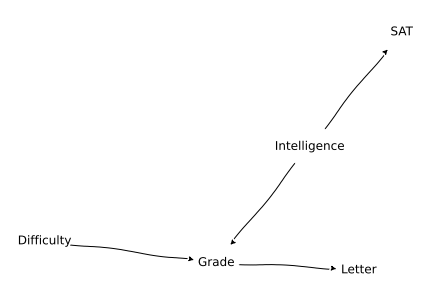

In [90]:
edges = [['Difficulty','Grade'],['Intelligence','Grade'],['Grade','Letter'],['Intelligence','SAT']]
G = nx.from_edgelist(edges, create_using=nx.DiGraph)
nx.draw(G, node_size = 2000, font = 25, with_labels = True, node_color = 'white',node_edge = 'black')
plt.show()

$I$ - Intelligence      
$D$ - Difficulty    
$G$ - Grade     
$S$ - SAT score   
$L$ - Letter(recommended)   

$P(I,D,G,S,L) = P(I) P(D) P(G|ID) P(L|G) P(S|I)$

**It tends out difficult to represent the CPDS**

In [122]:
cpd_d = pd.DataFrame([[0.6,0.4]], columns = ['d0','d1'])
cpd_i = pd.DataFrame([[0.7,0.3]], columns = ['i0','i1'])

values = [[0.3,0.4,0.3],[0.05,0.25,0.7],[0.7,0.08,0.02],[0.5,0.3,0.2]]
index = pd.MultiIndex.from_tuples([('i0','d0'),('i0','d1'),('i1','d0'),('i1','d1')], names=["i", "g"])
cpd_g = pd.DataFrame(values, columns = ['g1','g2','g3'], index = index)

cpd_l = pd.DataFrame([[0.1,0.9],[0.4,0.6],[0.99,0.01]], columns = ['l0','l1'], index = ['g1','g2','g3'])
cpd_s = pd.DataFrame([[0.95,0.05],[0.2,0.8]], columns = ['s0','s1'], index = ['i0','i1'])

In [123]:
cpd_d

,d0,d1
0,0.6,0.4


In [124]:
cpd_i

,i0,i1
0,0.7,0.3


In [125]:
cpd_g

g1    g2    g3
i  g                   
i0 d0  0.30  0.40  0.30
   d1  0.05  0.25  0.70
i1 d0  0.70  0.08  0.02
   d1  0.50  0.30  0.20

In [126]:
cpd_l

,l0,l1
g1,0.10,0.90
g2,0.40,0.60
g3,0.99,0.01


In [127]:
cpd_s

,s0,s1
i0,0.95,0.05
i1,0.20,0.80


## 10 Bayesian network
1. An directed acyclic grpah (DAG) whose nodes represents random variables, $X1, X2, ..... XN$
2. For each node $X_{i}$, a CPD $P(X_{i} | Par_{G}(X_{i}))$, dependence of $X_{i}$ given its parents $G$    
3. The Bayesian network represents a joint distribution using Chain rule for Bayes networks   

$P(X_{1},X_{2},...,X_{N}) = \prod P(X_{i} | Par_{G}(X_{i}))$